<a href="https://colab.research.google.com/github/WiemBorchani/Signal-Processing-project/blob/main/TS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Plot a wav file



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from pylab import *
from scipy.fft import fft
import scipy as sp
import wave
import sys
import os 

In [ ]:
#Accessing audio files
path = "/content/drive/My Drive/TS"
Drums_Sound = os.path.join(path ,"264201__jack-master__sequence.wav")
Record_Sound = os.path.join(path ,"record.wav")

##Drums_Sound

In [ ]:
spf_1 = wave.open(Drums_Sound, "r")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  This is separate from the ipykernel package so we can avoid doing imports until


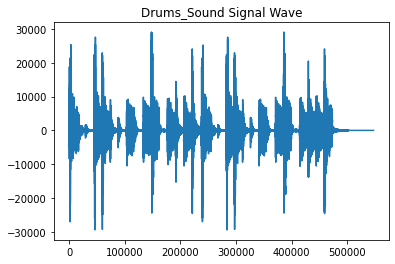

In [ ]:
# Extract Raw Audio from Wav File
signal_1 = spf_1.readframes(-1)
signal_1 = np.fromstring(signal_1, "Int16")
#Visualising Drums_Sound
plt.figure(1)
plt.title("Drums_Sound Signal Wave")
plt.plot(signal_1)
plt.show()

##Record_Sound

In [ ]:
spf_2 = wave.open(Record_Sound, "r")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  This is separate from the ipykernel package so we can avoid doing imports until


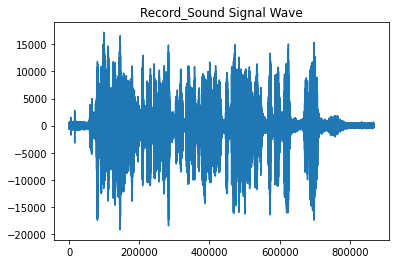

In [ ]:
# Extract Raw Audio from Wav File
signal_2 = spf_2.readframes(-1)
signal_2 = np.fromstring(signal_2, "Int16")  
#Visualising Drums_Sound
plt.figure(2)
plt.title("Record_Sound Signal Wave")
plt.plot(signal_2)
plt.show()

**bold text**# Sinusoidal Periodic signal


## Generating the Sinusoidal Periodic signal 

In [ ]:
SAMPLE_RATE = 4410  # frequency : Hertz : determines how many data points the signal uses to represent the sine wave per second.
DURATION = 5  # Seconds :the length of the generated sample.
T=1 

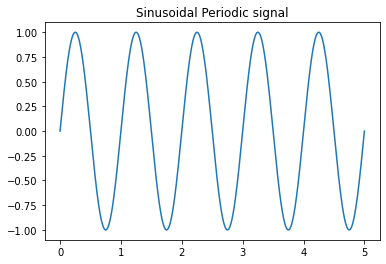

In [ ]:
def generate_sine_wave(freq, sample_rate, duration):
  """
  A function used to generate Sinusoidal Wave Signal 
  ...

  Attributes
    ----------
    Sample_rate : int 
      how many data points the signal uses to represent the sine wave per second
    Duration : int
      the length of the generated sample.

  Returns
    -------
    int 
      values that we’ll use to plot the wave
  """
  #  Represent evenly spaced numbers over a specified interval.
  x = np.linspace(0, duration, sample_rate * duration)
  # 2pi because np.sin takes radians
  y = np.sin((2 * np.pi) * x)
  
  return x, y

# Generate a 1 hertz sine wave using 4410 data points that lasts for 5 seconds 
x, y = generate_sine_wave( T,SAMPLE_RATE, DURATION)
plt.figure(3)
plt.title("Sinusoidal Periodic signal")
plt.plot(x, y)
plt.show()

In [ ]:
# Calculate power 
p = np.sum(y*y)/y.size
print(p)
# Calculate energy
e = p*y.size
print(e)
# Calculate mean
m = np.sqrt(e)
print(m)
# Calculate effective value
Se = np.sqrt(p)
print(Se)
#affichage de l'échelon, 

0.49997732426303854
11024.5
104.99761902062352
0.7070907468373763


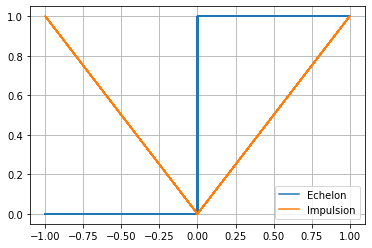

In [ ]:
impulsion = np.abs(y) 
echelon = (y>=0)

plt.plot(y,echelon,label="Echelon")
plt.plot(y,impulsion,label="Impulsion")
plt.grid()
plt.xlabel
plt.legend();

##The Dirac Comb

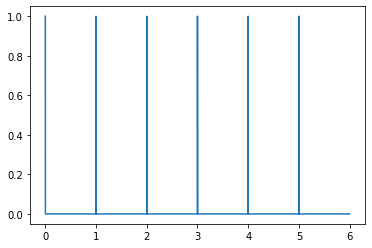

In [ ]:
t = np.arange(0, 6, 1/SAMPLE_RATE) # time range to consider
comb = np.zeros_like(t)
comb[::int(SAMPLE_RATE*T)] = T     # Comb becomes T every T*SAMPLE_RATE samples
plt.plot(t, comb)

##fourier transform


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


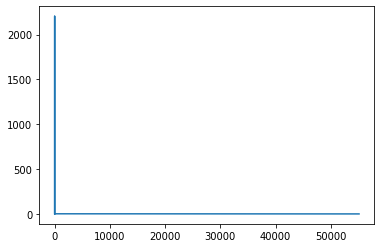

In [ ]:
N = SAMPLE_RATE * DURATION

yf = fft(x)
xf = fftfreq(N, 1 / SAMPLE_RATE)

plt.plot(xf, np.abs(yf))
plt.show()